1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem.
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.stats as ss
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.style.use('ggplot')

In [ ]:
PATH = "/content/drive/MyDrive/TH_NMMH/Week 03/TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


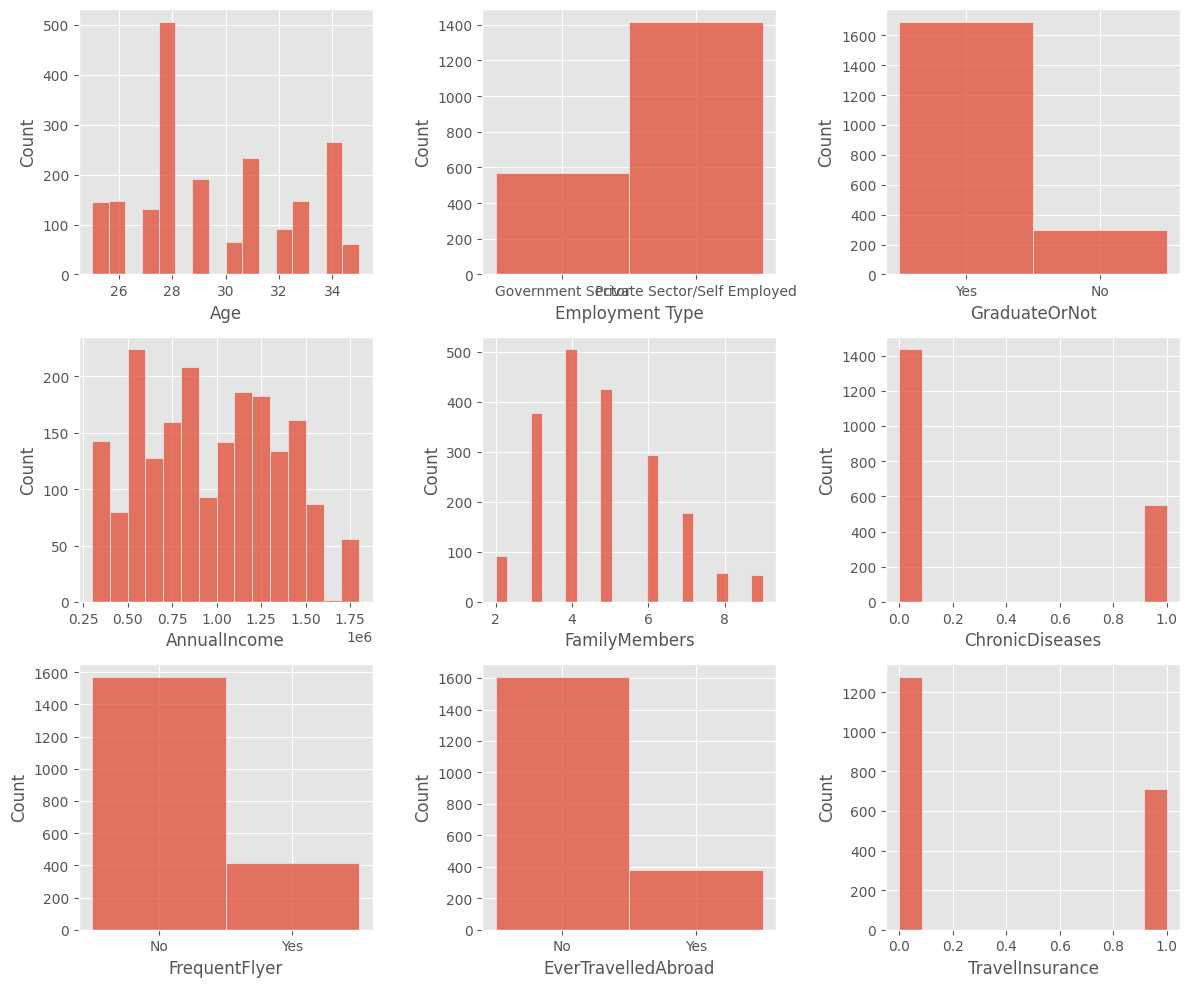

In [ ]:
#ToDo: Show histogram of dataframe
nrows = ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 10))
for i, col in enumerate(df.columns):
  r, c = i // ncols, i % ncols
  sns.histplot(data=df, x=col, ax=ax[r, c])
  ax[r, c].set_xlabel(col)

plt.tight_layout()

## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
df = df.rename(columns={'TravelInsurance': 'target'})
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,target
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df = df.astype({
    'ChronicDiseases': str,
    'target': str
})
df.info() # all columns are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   object
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   target               1987 non-null   object
dtypes: int64(3), object(6)
memory usage: 139.8+ KB


In [ ]:
categorical = df.select_dtypes(exclude='number')
numerical = df.select_dtypes(include='number')

print(f'Categorical Columns: \n{categorical.columns} \nNumerical Columns: \n{numerical.columns}')

Categorical Columns: 
Index(['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'target'],
      dtype='object') 
Numerical Columns: 
Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')


In [ ]:
df.duplicated().sum() # Too many

738

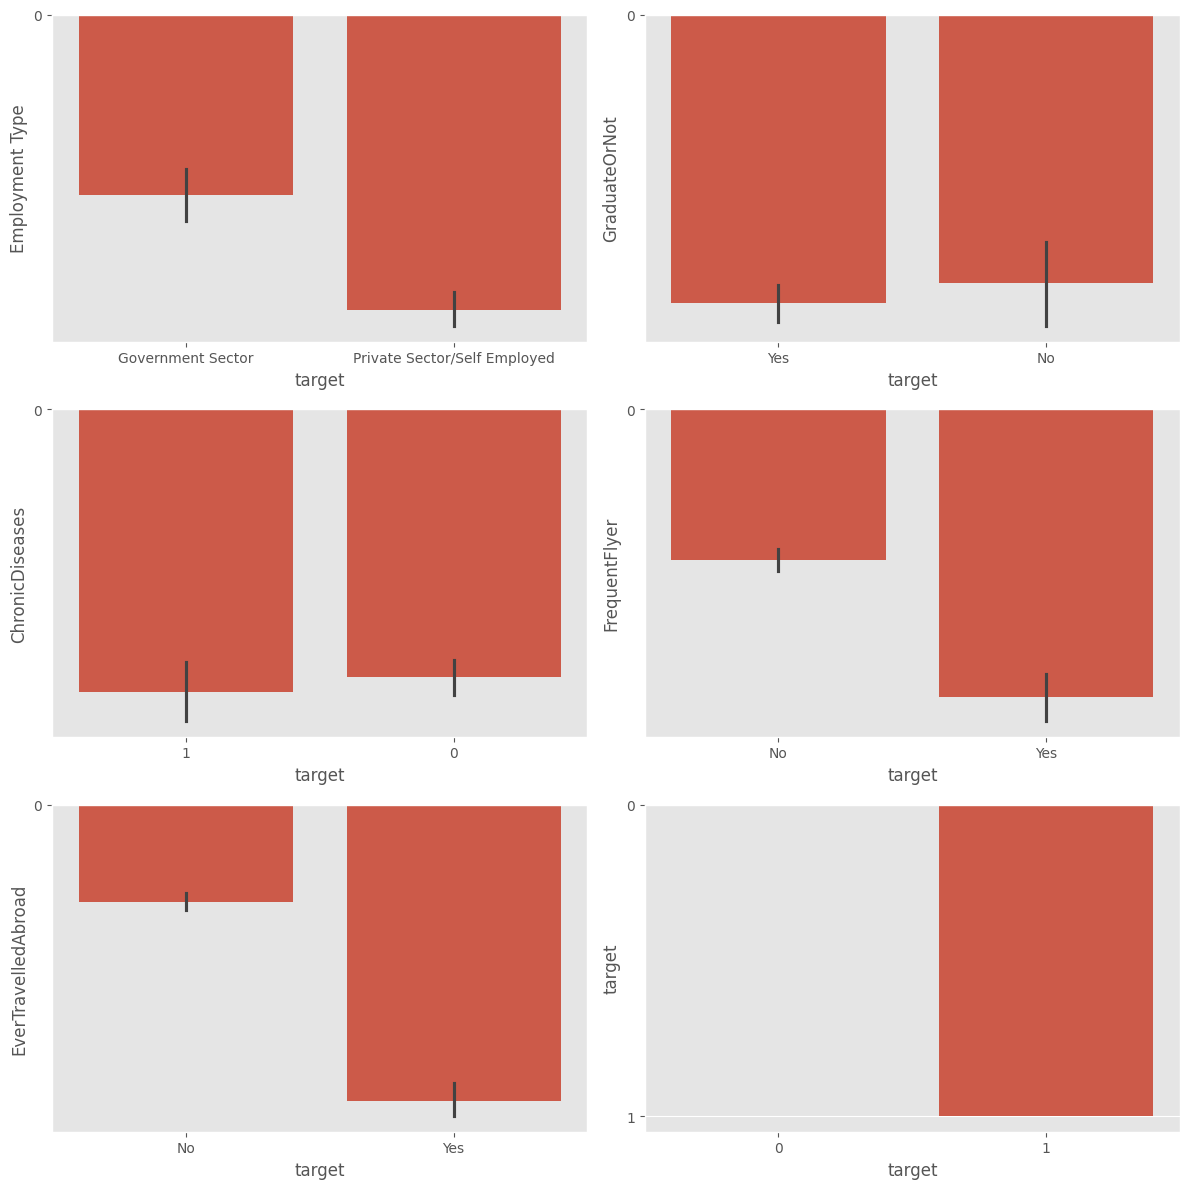

In [ ]:
nrows = 3; ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 12))
for i, col in enumerate(categorical.columns):
  r, c = i // ncols, i % ncols
  sns.barplot(data=categorical, x=col, y='target', ax=ax[r, c])
  ax[r, c].set_xlabel('target')
  ax[r, c].set_ylabel(col)

plt.tight_layout()

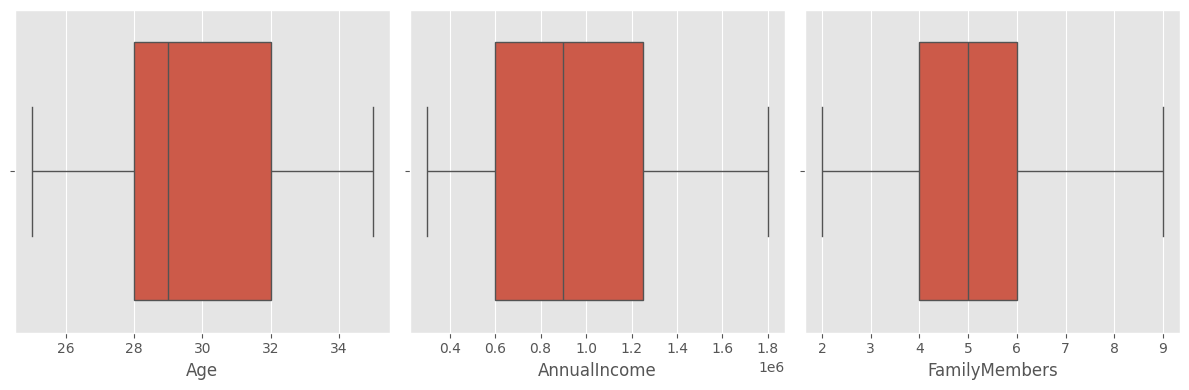

In [ ]:
nrows = 1; ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 4))
for i, col in enumerate(numerical.columns):
  sns.boxplot(data=numerical, x=col, ax=ax[i])

plt.tight_layout()

In [ ]:
df['target'].value_counts()

target
0    1277
1     710
Name: count, dtype: int64

## Preprocessing

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    print(f'Before preprocessing: {df.shape}')
    df = df.drop_duplicates()
    df = df.dropna()
    print(f'After preprocessing: {df.shape}')
    return df

In [ ]:
df = preprocessing_data(df.copy())

Before preprocessing: (1987, 9)
After preprocessing: (1249, 9)


## Feature Engineering

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,target
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


<Axes: >

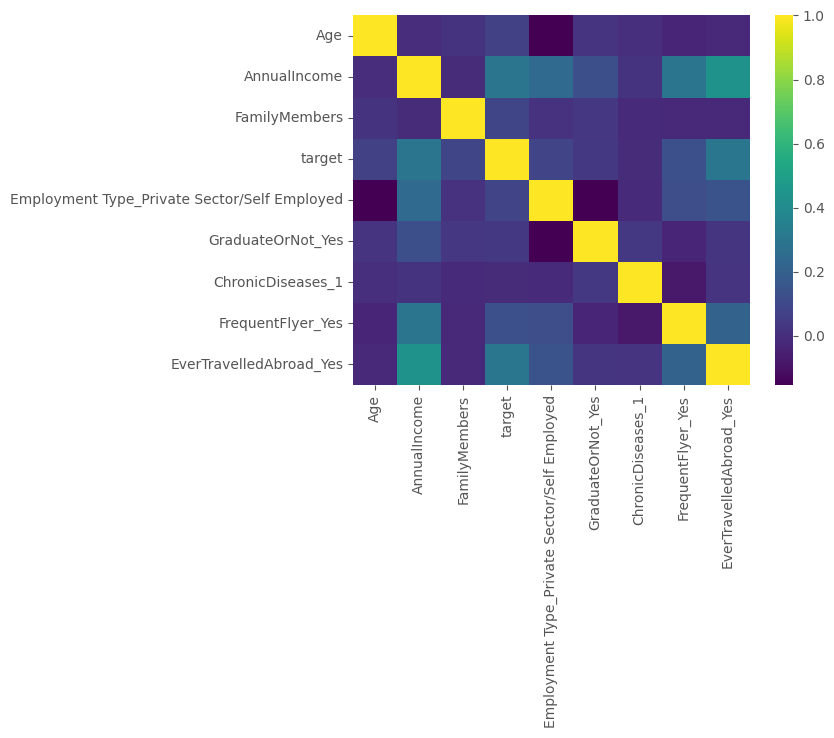

In [ ]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = pd.get_dummies(df, columns=categorical.drop(columns=['target']).columns, drop_first=True)
    return df

fe_df = apply_feature_engineering(df)
sns.heatmap(fe_df.corr(), cmap='viridis') # Show heatmap after normalized data

In [ ]:
fe_df.head()

,Age,AnnualIncome,FamilyMembers,target,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,ChronicDiseases_1,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,0,False,True,True,False,False
1,31,1250000,7,0,True,True,False,False,False
2,34,500000,4,1,True,True,True,False,False
3,28,700000,3,0,True,True,True,False,False
4,28,700000,8,0,True,True,True,True,False


In [ ]:
print(fe_df.corr()['target'].index)
print(fe_df.columns)

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'target',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_Yes',
       'ChronicDiseases_1', 'FrequentFlyer_Yes', 'EverTravelledAbroad_Yes'],
      dtype='object')
Index(['Age', 'AnnualIncome', 'FamilyMembers', 'target',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_Yes',
       'ChronicDiseases_1', 'FrequentFlyer_Yes', 'EverTravelledAbroad_Yes'],
      dtype='object')


In [ ]:
fe_df.corr()['target']

Age                                             0.067536
AnnualIncome                                    0.293913
FamilyMembers                                   0.084907
target                                          1.000000
Employment Type_Private Sector/Self Employed    0.076309
GraduateOrNot_Yes                               0.031770
ChronicDiseases_1                              -0.010015
FrequentFlyer_Yes                               0.127426
EverTravelledAbroad_Yes                         0.301224
Name: target, dtype: float64

<Axes: >

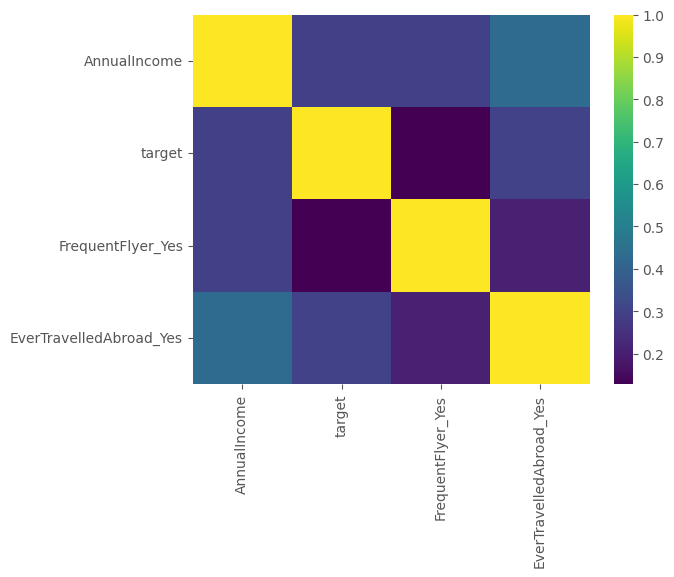

In [ ]:
for value, col in zip(fe_df.corr()['target'], fe_df.columns):
  if abs(value) < 0.1:
    fe_df.drop(columns=col, inplace=True)

sns.heatmap(fe_df.corr(), cmap='viridis')

In [ ]:
print(fe_df.shape)

(1249, 4)


In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns=['target']) # Todo: Select features
    y = df.target # Todo: Select label
    y = np.array(y, dtype=int)
    return X, y

X, y = prepare_X_y(fe_df)

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 242
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
from sklearn.metrics import classification_report, precision_score, \
  recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
weights = np.where(trainY==0, 1.5, 1)

In [ ]:
def build_model_gaussian(X, y, weights: np.ndarray = None):
    scaler = MinMaxScaler()
    gau_nb = GaussianNB()

    pipeline = Pipeline(steps=[
        ('scaler', scaler),
        ('gau_nb', gau_nb),
    ])

    var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'gau_nb__var_smoothing': var_smoothing_values,
    }

    # Todo: fit your model with X, y
    search = GridSearchCV(pipeline, param_grid, n_jobs=2)
    search.fit(X, y, **{'gau_nb__sample_weight': weights})
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

    return search

gau_model = build_model_gaussian(trainX['AnnualIncome'].values.reshape(-1, 1), trainY, weights=weights)

Best parameter (CV score=0.675):
{'gau_nb__var_smoothing': 0.0001, 'scaler__feature_range': (-1, 1)}


In [ ]:
def build_model_bernoulli(X, y, weights: np.ndarray = None):
  ber_nb = BernoulliNB()

  pipeline = Pipeline(steps=[
      ('ber_nb', ber_nb),
  ])

  alpha_values = [0.01, 0.1, 0.5, 1, 10]
  param_grid = {
      'ber_nb__alpha': alpha_values
  }
  search = GridSearchCV(pipeline, param_grid, n_jobs=2)
  search.fit(X, y, **{'ber_nb__sample_weight': weights})
  print("Best parameter (CV score=%0.3f):" % search.best_score_)
  print(search.best_params_)
  return search

ber_model = build_model_bernoulli(trainX[['FrequentFlyer_Yes', 'EverTravelledAbroad_Yes']], trainY, weights=weights)

Best parameter (CV score=0.675):
{'ber_nb__alpha': 0.01}


In [ ]:
def stack_model(X_train, y_train, X_test):
  gaussian_features = ['AnnualIncome']
  bernoulli_features = ['FrequentFlyer_Yes', 'EverTravelledAbroad_Yes']

  gaussian_pipeline = make_pipeline(MinMaxScaler((-1, 1)), GaussianNB(var_smoothing=0.0001))
  bernoulli_pipeline = make_pipeline(BernoulliNB(alpha=0.01))

  stack = StackingClassifier(
    estimators=[
        ('gaussian', gaussian_pipeline),
        ('bernoulli', bernoulli_pipeline)
    ],
    final_estimator=LogisticRegression()
  )
  stack.fit(X_train, y_train)
  return stack.predict_proba(X_test)

pred_prob = stack_model(trainX, trainY, testX)

In [ ]:
def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("accuracy: ", accuracy_score(y_true, y_pred))
    print("precision: ", precision_score(y_true, y_pred, average='weighted'))
    print("recall: ", recall_score(y_true, y_pred, average='weighted'))
    print("F1: ", f1_score(y_true, y_pred, average='weighted'))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred, average='weighted')
    return main_score

In [ ]:
f1 = []

for i in np.arange(0.2, 0.9, 0.01):
  p = np.where(pred_prob[:, 0] > i, 0, 1)
  f1.append(f1_score(testY, p, average='weighted'))

max_f1 = max(f1)
arg = np.argmax(f1)

threshold = 0.2 + 0.01 * arg
print(threshold, max_f1)

0.55 0.7214375910636232


In [ ]:
pred = np.where(pred_prob[:, 0] > threshold, 0, 1)

accuracy:  0.74
precision:  0.7377156177156178
recall:  0.74
F1:  0.7214375910636232


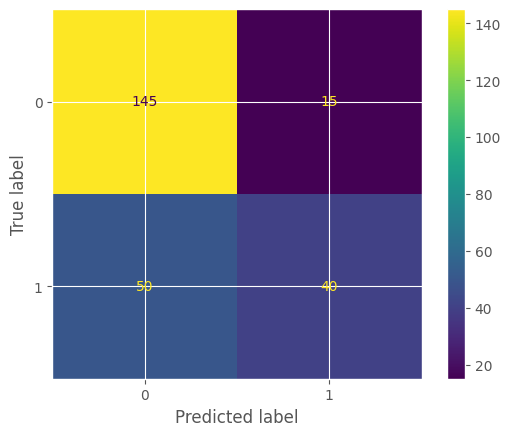

In [ ]:
f1 = calculate_performance(testY, pred) #Todo Input
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testY, pred))
disp.plot()

In [1]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return """
      7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)

      Main metric nên là F1-Score,
      - Xét về mặt dữ liệu: sự chêch lệch giữa hai label 0 và 1 (~66% và ~33%)
      - Xét về tính logic trong thực tế: cả hai trường hợp dự đoán sai (người dùng có mua nhưng mô hình nói không hoặc người dùng không mua nhưng mô hình dự đoán có) đều quan trọng và cần được tối thiểu hóa một cách triệt đẻe bởi vì cả hai trường hợp đều ảnh hưởng đến doanh thu hoặc uy tín của công ty

      Scaler được chọn trong bài làm là MinMaxScaler với feature_range = (-1, 1) (do GridSearchCV quyết định) bởi vì phân phối hai trong ba feature là 'Age' và 'AnnualIncome' không sát với phân phối chuẩn nên em không lựa chọn StandScaler() và vì dữ liệu không có outliers nên em cũng không lựa chọn RobustScaler()

      Đối với feature engineering, em sử dụng phương pháp Correlation để tìm ra các feature có độ tương quan thấp (< 0.1) so với emrget feature. Từ đó loại bỏ chúng ra khỏi bộ dữ liệu.

      Về phần mô hình Naive Bayes, trong bài báo cáo này, em sẽ dùng phương pháp Stacking để kết hợp hai mô hình là Gaussian Naive Bayes (áp dụng cho continous features) và Bernoulli Naive Bayes (áp dụng cho categorical features) và setup param final_estimator là mô hình Logistic Regression đã được học trước.
      Đối với params tối ưu cho hai mô hình Naive Bayes đã được GridSearchCV tìm ra là $var \_ smoothing = 10^{-4}$ cho Gaussian Naive Bayes và $alpha = 0.01$ cho Bernoulli Naive Bayes.


      Other conclusion: trong bài lần này, em sử dụng param sample_weights trong hàm fit() để giảm bớt sự thiên kiến về label 0 (do có sự chêch lệch) nhằm gia tăng F1-Score trên tập Test
    """

7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)

Main metric nên là F1-Score,
- Xét về mặt dữ liệu: sự chêch lệch giữa hai label 0 và 1 (~66% và ~33%)
- Xét về tính logic trong thực tế: cả hai trường hợp dự đoán sai (người dùng có mua nhưng mô hình nói không hoặc người dùng không mua nhưng mô hình dự đoán có) đều quan trọng và cần được tối thiểu hóa một cách triệt đẻe bởi vì cả hai trường hợp đều ảnh hưởng đến doanh thu hoặc uy tín của công ty

Scaler được chọn trong bài làm là MinMaxScaler với feature_range = (-1, 1) (do GridSearchCV quyết định) bởi vì phân phối hai trong ba feature là 'Age' và 'AnnualIncome' không sát với phân phối chuẩn nên em không lựa chọn StandScaler() và vì dữ liệu không có outliers nên em cũng không lựa chọn RobustScaler()

Đối với feature engineering, em sử dụng phương pháp Correlation để tìm ra các feature có độ tương quan thấp (< 0.1) so với emrget feature. Từ đó loại bỏ chúng ra khỏi bộ dữ liệu.

Về phần mô hình Naive Bayes, trong bài báo cáo này, em sẽ dùng phương pháp Stacking để kết hợp hai mô hình là Gaussian Naive Bayes (áp dụng cho continous features) và Bernoulli Naive Bayes (áp dụng cho categorical features) và setup param final_estimator là mô hình Logistic Regression đã được học trước. Đối với params tối ưu cho hai mô hình Naive Bayes đã được GridSearchCV tìm ra là $var \_ smoothing = 10^{-4}$ cho Gaussian Naive Bayes và $alpha = 0.01$ cho Bernoulli Naive Bayes.


Other conclusion: trong bài lần này, em sử dụng param sample_weights trong hàm fit() để giảm bớt sự thiên kiến về label 0 (do có sự chêch lệch) nhằm gia tăng F1-Score trên tập Test